# 📖 딥러닝 모델의 Inductive Bias & NSMC 감정 분석 실습

## ✅ **TODO: 과제 1 - Inductive Bias 탐구**
- [ ] FC Layer, RNN, LSTM, Attention의 Inductive Bias 조사  
- [ ] 개인의 해석을 정리하여 기입

---

## ✅ **TODO: 과제 2 - NSMC 감정 분석 실습** (❗빈칸 채우기 실습 포함 )  
- [ ] NSMC 데이터 전처리 (토큰화, 어휘 사전 생성)  
- [ ] RNN, LSTM, Attention 모델 구현 **(빈칸 채우기!)**  
- [ ] 모델 학습 및 평가 (정확도 비교, Confusion Matrix 분석)  
- [ ] 사용자 입력 문장 감정 분석  

📌 **Colab 실행 시 GPU (`T4`) 사용 권장!**


---
---

# 📖 과제 1 : FC Layer, RNN, LSTM, Attention의 Inductive Bias 탐구

## 📌 과제 개요  
이 과제에서는 딥러닝에서 자주 사용되는 **Fully Connected (FC) Layer, RNN, LSTM, Attention**의 **Inductive Bias**를 비교·탐구합니다.  
Inductive Bias란 **모델이 학습할 때 선호하는 패턴이나 추론 방식의 특성을 의미**하며, 서로 다른 신경망 구조에서 어떻게 다르게 나타나는지 분석하는 것이 목표입니다.  



## 📂  과제 요구사항  

### 📌 모델별 Inductive Bias 개념 조사  
각 모델이 가지고 있는 **Inductive Bias**에 대해 조사하고, **이론적 배경을 정리**하세요.  
다음 질문에 대한 답변을 정리하세요.


**FC Layer**: Fully Connected Layer는 어떤 inductive bias를 가지며, 어떤 패턴을 학습하는가?  

답변 : Fully Connected Layer는 모든 뉴런이 서로 연결되어 있어 입력 간의 특정 구조를 가정하지 않는 일반적인 패턴 학습을 수행한다. 따라서 공간적인 관계(예: 이미지의 위치 정보)나 순차적 관계(예: 시계열 데이터)를 반영하는 inductive bias가 약하게 작용한다.

**RNN**: 순환 구조가 inductive bias에 어떤 영향을 미치는가?  

답변 : RNN의 순환 구조는 시간적 순서가 중요한 데이터에서 이전 정보가 현재 상태에 영향을 미친다는 inductive bias를 제공한다. 즉, 데이터가 순차적이며, 시계열적 의존성이 존재한다고 가정하여 학습을 수행한다. 이러한 구조 덕분에 텍스트, 음성, 금융 데이터 등 시계열 데이터의 패턴을 효과적으로 학습할 수 있지만, 긴 시퀀스에서는 기울기 소실 문제로 인해 장기 의존성 학습이 어려울 수 있다.

**LSTM**: 장기 의존성 문제를 해결하기 위해 어떤 inductive bias가 추가되는가?  
답변 : LSTM은 장기 의존성 문제를 해결하기 위해 ‘셀 상태(Cell State)’와 ‘게이트 메커니즘(Gating Mechanism)’을 도입하여 새로운 inductive bias를 추가한다.

1. 셀 상태의 유지 → 네트워크가 장기 정보를 직접 전달할 수 있다고 가정하여, 정보가 오래 보존될 수 있도록 유도한다.
2. 게이트 구조 → 입력 게이트(Input Gate), 망각 게이트(Forget Gate), 출력 게이트(Output Gate)를 통해 중요한 정보만 선택적으로 유지 및 업데이트할 수 있다고 가정한다.

정보 흐름을 직접 조절할 수 있도록 설계된 구조적 inductive bias 덕분에, 기울기 소실 문제를 완화하여 기존 RNN보다 긴 시퀀스에서도 효과적으로 학습할 수 있다.

**Attention**: 문장 내 특정 단어에 집중하는 Attention 메커니즘의 inductive bias는 어떤 특징이 있는가?

답변 : Attention 메커니즘의 inductive bias는 입력 내 특정 요소가 더 중요한 정보를 가질 수 있으며, 모든 요소 간의 관계를 직접 학습할 수 있다는 가정에서 비롯된다. 기존 RNN이 순차적으로 데이터를 처리하며 과거 정보가 현재 상태에 영향을 미친다고 가정하는 반면, Attention은 문장 내 모든 단어를 동시에 고려할 수 있는 구조적 특성을 가진다. 이를 통해 특정 단어가 문맥적으로 더 중요한 역할을 할 수 있다고 학습하며, 장기 의존성을 효과적으로 다룰 수 있도록 유도한다. 또한, 순차적 처리가 필요한 RNN과 달리, Attention은 입력 간의 관계를 병렬적으로 계산할 수 있다고 가정하여 학습 속도와 추론 효율성을 크게 향상시킨다.

---

# 📖 과제 2 : 네이버 영화 리뷰 감정 분석 (NSMC) 실습  

## 📌 1. 실습 개요  
이 실습에서는 **네이버 영화 리뷰 감정 분석 데이터(NSMC)**를 사용하여 텍스트 감정을 분류하는 **딥러닝 모델(RNN, LSTM, RNN+Attention)**을 학습합니다.  
각 모델의 성능을 비교하고, **사용자 입력 문장에 대한 감정 예측**을 수행합니다.  


## 🎯 2. 실습 목표  
✔ 감정 분석을 위한 데이터 전처리 및 모델 학습 이해  
✔ RNN, LSTM, Attention을 활용한 감정 분석 모델 구현 및 성능 비교  
✔ 학습한 모델이 실제 문장을 어떻게 분류하는지 확인  

### GPU 사용 권장! (ex, colab의 T4)


In [2]:
############################
# 0. 기본 설치 (Colab 환경)
############################

# Colab 등에서 한국어 형태소 분석기 사용 위해 konlpy 설치

!pip install konlpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 31.8 MB/s eta 0:00:00


In [3]:
############################
# 1. 라이브러리 임포트
############################

import sys
import os
import urllib.request

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from torch.utils.data import Dataset, DataLoader

# GPU 사용 가능 여부
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 한국어 형태소 분석기 (예: Okt 사용)
from konlpy.tag import Okt
okt = Okt()


Using device: cuda


In [4]:
############################
# 2. NSMC 데이터 다운로드
############################

# ratings_train.txt, ratings_test.txt 파일이 없다면 다운로드
# (Colab 환경에서 예시)
if not os.path.isfile("ratings_train.txt"):
    url_train = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
    urllib.request.urlretrieve(url_train, "ratings_train.txt")

if not os.path.isfile("ratings_test.txt"):
    url_test = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt"
    urllib.request.urlretrieve(url_test, "ratings_test.txt")

print("NSMC 데이터 다운로드 완료")


NSMC 데이터 다운로드 완료


In [5]:
############################
# 3. 데이터 로드 및 전처리
############################

def load_data(filepath):
    """
    ratings_train.txt / ratings_test.txt 파일을 불러와서
    [text, label] 형태의 리스트를 반환
    """
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        next(f)  # 헤더 건너뛰기
        for line in f:
            id_, text, label = line.strip().split('\t')
            if text == "":  # 공백 리뷰 제거
                continue
            data.append((text, int(label)))
    return data

train_data_raw = load_data("ratings_train.txt")
test_data_raw = load_data("ratings_test.txt")

print("훈련 데이터 개수:", len(train_data_raw))
print("테스트 데이터 개수:", len(test_data_raw))

# 데이터 샘플 확인
print("\n첫 번째 훈련 샘플:", train_data_raw[0])


훈련 데이터 개수: 149995
테스트 데이터 개수: 49997

첫 번째 훈련 샘플: ('아 더빙.. 진짜 짜증나네요 목소리', 0)


In [6]:
############################
# 3-1. 형태소 분석 & 토큰화
############################

def tokenize(text):
    """
    간단히 Okt 형태소 분석기로 명사, 동사 등 단어 단위 토큰화 예시.
    필요에 따라 불용어 제거 등의 추가 처리가 가능.
    """
    # 예시: 불필요한 기호 제거 (정규 표현식 등)
    # 여기서는 간단히 한글, 영문, 숫자, 공백, 일부 문장부호만 남긴다고 가정
    import re
    text = re.sub(r"[^가-힣0-9a-zA-Z\s?!.,]", "", text)

    # 형태소 분석(Okt)
    # 이 예시에선 그냥 morphemes만 추출
    tokens = okt.morphs(text.strip())
    return tokens

# 간단 테스트
sample_text = train_data_raw[0][0]
print("원문:", sample_text)
print("토큰화 결과:", tokenize(sample_text))


원문: 아 더빙.. 진짜 짜증나네요 목소리
토큰화 결과: ['아', '더빙', '..', '진짜', '짜증나네요', '목소리']


In [7]:
############################
# 3-2. 어휘 사전(Vocabulary) 생성
############################

from collections import defaultdict

# 매우 큰 데이터를 모두 사용할 경우 시간이 오래 걸릴 수 있으므로,
# 우선 "일부" 데이터(예: 상위 N개)만 사용해 시범실습할 수도 있습니다.
# 필요시 full_data = train_data_raw 로 변경하세요.
N = 20000  # 시범으로 2만 개만 사용할 경우
full_data = train_data_raw[:N]

word_freq = defaultdict(int)

for text, label in full_data:
    tokens = tokenize(text)
    for tok in tokens:
        word_freq[tok] += 1

# 사용 빈도가 낮은 단어는 제외 (예: 3회 미만)
min_freq = 3
vocab = ["<pad>", "<unk>"]
for w, f in word_freq.items():
    if f >= min_freq:
        vocab.append(w)

word2idx = {w: i for i, w in enumerate(vocab)}
print("단어 사전 크기:", len(vocab))

def text_to_ids(text, word2idx):
    tokens = tokenize(text)
    ids = []
    for tok in tokens:
        ids.append(word2idx.get(tok, word2idx["<unk>"]))
    return ids


단어 사전 크기: 8845


In [8]:
############################
# 4. Dataset 및 DataLoader 구성
############################

# 최대 문장 길이(패딩을 위한). 너무 크게 잡으면 메모리 사용량 증가
max_len = 30

def pad_sequences(seq, max_len):
    """
    입력된 seq (List of token ids)에 대해
    max_len만큼 뒤를 <pad> 토큰으로 채워넣거나 자르는 함수
    """
    if len(seq) < max_len:
        seq = seq + [word2idx["<pad>"]] * (max_len - len(seq))
    else:
        seq = seq[:max_len]
    return seq

class NSMCDataset(Dataset):
    def __init__(self, data, word2idx, max_len=30):
        self.data = data
        self.word2idx = word2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text, label = self.data[idx]
        token_ids = text_to_ids(text, self.word2idx)
        token_ids = pad_sequences(token_ids, self.max_len)
        return torch.LongTensor(token_ids), torch.LongTensor([label])

# 실제로는 전 데이터 쓰려면 full_data = train_data_raw, etc.
# 여기서는 위에서 N=20000으로 제한한 데이터 사용 (시간 단축용)
train_dataset = NSMCDataset(full_data, word2idx, max_len=max_len)
test_dataset = NSMCDataset(test_data_raw, word2idx, max_len=max_len)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"훈련 배치 개수: {len(train_loader)}")
print(f"테스트 배치 개수: {len(test_loader)}")


훈련 배치 개수: 313
테스트 배치 개수: 782


In [9]:
############################
# 4. Dataset 및 DataLoader 구성
############################

# 최대 문장 길이(패딩을 위한). 너무 크게 잡으면 메모리 사용량 증가
max_len = 30

def pad_sequences(seq, max_len):
    """
    입력된 seq (List of token ids)에 대해
    max_len만큼 뒤를 <pad> 토큰으로 채워넣거나 자르는 함수
    """
    if len(seq) < max_len:
        seq = seq + [word2idx["<pad>"]] * (max_len - len(seq))
    else:
        seq = seq[:max_len]
    return seq

class NSMCDataset(Dataset):
    def __init__(self, data, word2idx, max_len=30):
        self.data = data
        self.word2idx = word2idx
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text, label = self.data[idx]
        token_ids = text_to_ids(text, self.word2idx)
        token_ids = pad_sequences(token_ids, self.max_len)
        return torch.LongTensor(token_ids), torch.LongTensor([label])

# 실제로는 전 데이터 쓰려면 full_data = train_data_raw, etc.
# 여기서는 위에서 N=20000으로 제한한 데이터 사용 (시간 단축용)
train_dataset = NSMCDataset(full_data, word2idx, max_len=max_len)
test_dataset = NSMCDataset(test_data_raw, word2idx, max_len=max_len)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"훈련 배치 개수: {len(train_loader)}")
print(f"테스트 배치 개수: {len(test_loader)}")


훈련 배치 개수: 313
테스트 배치 개수: 782


In [10]:
############################
# 5. 모델 정의
#   5-1) RNN Classifier
############################

class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes=2):
        super(RNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)  # (힌트: 입력 차원은 단어 임베딩 차원, 은닉 상태 차원은 hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_classes)  # (힌트: 마지막 은닉 상태 크기와 출력 클래스 개수)

    def forward(self, x):
        # x shape: (batch, seq_len)
        embedded = self.embedding(x)  # (batch, seq_len, embed_dim)
        output, hidden = self.rnn(embedded)  # (힌트: RNN의 입력은 임베딩된 단어 벡터)
        last_hidden = hidden[0]  # (힌트: RNN의 마지막 은닉 상태를 가져오기, 0번째 인덱스 사용)
        logits = self.fc(last_hidden)  # (힌트: 최종 은닉 상태를 FC Layer에 통과시켜 감정 예측)
        return logits

############################
#   5-2) LSTM Classifier
############################

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes=2):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)  # (힌트: 단어 사전 크기와 임베딩 차원 입력)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)  # (힌트: LSTM의 입력 차원은 embed_dim, 출력 차원은 hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_classes)  # (힌트: 마지막 은닉 상태 크기와 출력 클래스 개수)

    def forward(self, x):
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)
        last_hidden = hidden[0]  # (힌트: LSTM의 마지막 hidden state 사용, 0번째 인덱스)
        logits = self.fc(last_hidden)  # (힌트: 마지막 은닉 상태를 FC Layer에 통과시켜 감정 예측)
        return logits

############################
#   5-3) RNN + Attention
############################

class RNNWithAttention(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes=2):
        super(RNNWithAttention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)  # (힌트: 단어 사전 크기와 임베딩 차원 입력)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)  # (힌트: RNN의 입력 차원은 embed_dim, 출력 차원은 hidden_dim)
        self.attn_fc = nn.Linear(hidden_dim, 1)  # (힌트: attention 가중치를 학습하는 FC Layer, 입력은 hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_classes)  # (힌트: 최종 context 벡터를 감정 분류하는 FC Layer에 입력)

    def forward(self, x):
        embedded = self.embedding(x)  # (batch, seq_len, embed_dim)
        output, hidden = self.rnn(embedded)  # (batch, seq_len, hidden_dim)

        # 스코어 계산
        score = torch.tanh(self.attn_fc(output))  # (힌트: output을 attention layer에 통과)

        # hidden_dim -> 1 로 축소하여 각 타임스텝별 스칼라 스코어 얻기
        score = torch.sum(score, dim=2)  # (힌트: hidden_dim 차원 축소, dim=2)

        # softmax로 가중치 계산
        attn_weights = F.softmax(score, dim=1).unsqueeze(-1)  # (힌트: 시퀀스 차원에 대해 softmax 적용, dim=1)

        # 가중합
        context = output * attn_weights  # (batch, seq_len, hidden_dim)
        context = torch.sum(context, dim=1)  # (힌트: 타임스텝 차원을 축소하여 문장 단위 벡터 얻기, dim=1)

        logits = self.fc(context)  # (힌트: context 벡터를 FC Layer에 입력하여 감정 분류)
        return logits


In [11]:
############################
# 6. 학습 / 평가 루프 정의
############################

def train_model(model, train_loader, val_loader=None, epochs=5, lr=0.001):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    train_losses = []
    val_accuracies = []

    for epoch in range(1, epochs+1):
        model.train()
        running_loss = 0.0

        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)      # (batch, seq_len)
            labels = labels.squeeze().to(device)  # (batch)

            optimizer.zero_grad()
            outputs = model(inputs)         # (batch, num_classes)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # 에폭별 평균 로스
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        # 검증 정확도(옵션)
        if val_loader is not None:
            acc = evaluate_model(model, val_loader)
            val_accuracies.append(acc)
            print(f"[Epoch {epoch}] Train Loss: {epoch_loss:.4f}, Val Acc: {acc*100:.2f}%")
        else:
            print(f"[Epoch {epoch}] Train Loss: {epoch_loss:.4f}")

    return train_losses, val_accuracies

def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for (inputs, labels) in data_loader:
            inputs = inputs.to(device)
            labels = labels.squeeze().to(device)

            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy().tolist())
            all_labels.extend(labels.cpu().numpy().tolist())

    acc = accuracy_score(all_labels, all_preds)
    return acc

def plot_training_curve(train_losses, val_accuracies=None, title="Training Curve"):
    plt.figure(figsize=(10,4))

    # 학습 손실 곡선
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Train Loss')
    plt.title("Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # 검증 정확도 곡선
    if val_accuracies is not None and len(val_accuracies) > 0:
        plt.subplot(1,2,2)
        plt.plot(val_accuracies, label='Val Acc', color='orange')
        plt.title("Validation Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()

    plt.suptitle(title)
    plt.show()


In [12]:
############################
# 7. 데이터 분할(Train/Valid) 준비
############################

# 여기서는 별도의 Validation 세트를 만들지 않고,
# 주어진 test_data_raw를 최종 테스트 용도로만 사용할 수도 있음.
# 하지만 간단히 train_data_raw를 다시 train/val로 나누는 방법 시연.

from sklearn.model_selection import train_test_split

# 현재 full_data (N=20000) 중 80%: train, 20%: val
train_subset, val_subset = train_test_split(full_data, test_size=0.2, random_state=42)

train_dataset_2 = NSMCDataset(train_subset, word2idx, max_len)
val_dataset_2   = NSMCDataset(val_subset, word2idx, max_len)

train_loader_2 = DataLoader(train_dataset_2, batch_size=batch_size, shuffle=True)
val_loader_2   = DataLoader(val_dataset_2, batch_size=batch_size, shuffle=False)

print(f"Train subset: {len(train_subset)}, Val subset: {len(val_subset)}")


Train subset: 16000, Val subset: 4000


========= RNN Training =========
[Epoch 1] Train Loss: 0.6991, Val Acc: 51.15%
[Epoch 2] Train Loss: 0.6898, Val Acc: 50.75%
[Epoch 3] Train Loss: 0.6820, Val Acc: 49.12%
[Epoch 4] Train Loss: 0.6676, Val Acc: 49.38%
[Epoch 5] Train Loss: 0.6499, Val Acc: 51.60%
[Epoch 6] Train Loss: 0.6487, Val Acc: 51.78%
[Epoch 7] Train Loss: 0.6363, Val Acc: 51.30%
[Epoch 8] Train Loss: 0.6238, Val Acc: 49.30%
[Epoch 9] Train Loss: 0.6177, Val Acc: 49.25%
[Epoch 10] Train Loss: 0.6178, Val Acc: 51.60%


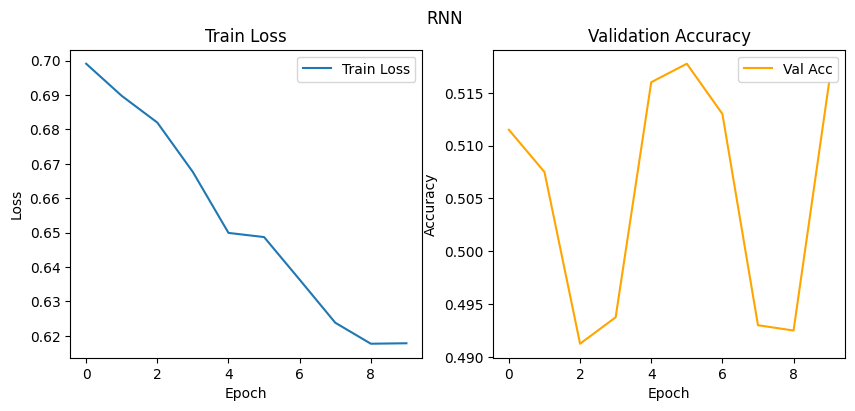

RNN Test Accuracy: 51.25%

========= LSTM Training =========
[Epoch 1] Train Loss: 0.6944, Val Acc: 51.70%
[Epoch 2] Train Loss: 0.6630, Val Acc: 69.80%
[Epoch 3] Train Loss: 0.4813, Val Acc: 77.12%
[Epoch 4] Train Loss: 0.3603, Val Acc: 78.42%
[Epoch 5] Train Loss: 0.2707, Val Acc: 78.12%
[Epoch 6] Train Loss: 0.1964, Val Acc: 78.88%
[Epoch 7] Train Loss: 0.1414, Val Acc: 78.40%
[Epoch 8] Train Loss: 0.0935, Val Acc: 78.50%
[Epoch 9] Train Loss: 0.0731, Val Acc: 78.85%
[Epoch 10] Train Loss: 0.0590, Val Acc: 78.45%


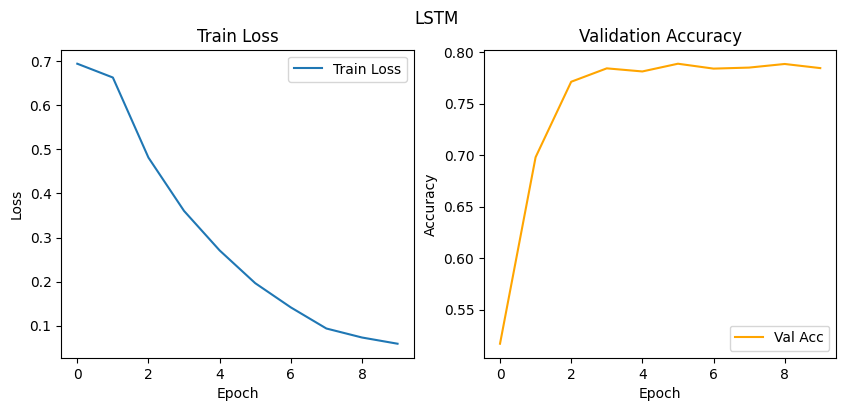

LSTM Test Accuracy: 77.99%

========= RNN + Attention Training =========
[Epoch 1] Train Loss: 0.6102, Val Acc: 72.32%
[Epoch 2] Train Loss: 0.4739, Val Acc: 76.92%
[Epoch 3] Train Loss: 0.3878, Val Acc: 78.88%
[Epoch 4] Train Loss: 0.3254, Val Acc: 78.80%
[Epoch 5] Train Loss: 0.2688, Val Acc: 79.70%
[Epoch 6] Train Loss: 0.2164, Val Acc: 79.72%
[Epoch 7] Train Loss: 0.1694, Val Acc: 79.67%
[Epoch 8] Train Loss: 0.1335, Val Acc: 79.25%
[Epoch 9] Train Loss: 0.0994, Val Acc: 79.15%
[Epoch 10] Train Loss: 0.0772, Val Acc: 78.27%


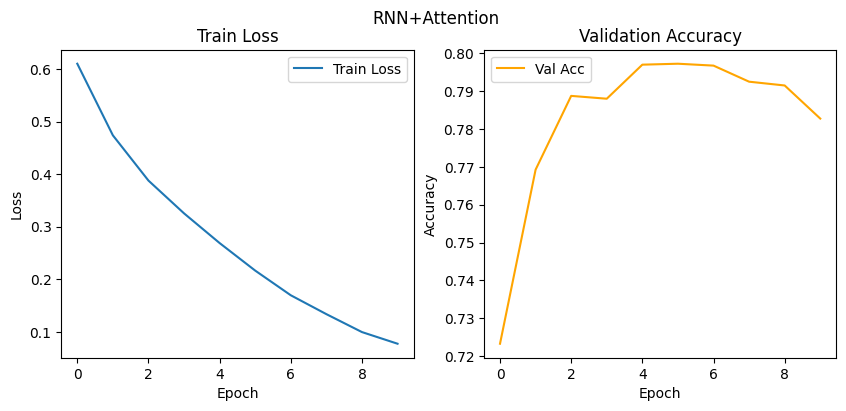

RNN+Attention Test Accuracy: 77.65%



In [13]:
############################
# 8. 모델별 학습 & 평가
############################

embed_dim = 128
hidden_dim = 128
num_classes = 2
EPOCHS = 10 # 유동적으로 조절하세요
LR = 0.001

# --- 8-1. RNN ---
print("========= RNN Training =========")
rnn_model = RNNClassifier(len(vocab), embed_dim, hidden_dim, num_classes)
rnn_train_losses, rnn_val_accs = train_model(rnn_model, train_loader_2, val_loader_2, epochs=EPOCHS, lr=LR)
plot_training_curve(rnn_train_losses, rnn_val_accs, title="RNN")

# 최종 테스트 세트 정확도
rnn_test_acc = evaluate_model(rnn_model, test_loader)
print(f"RNN Test Accuracy: {rnn_test_acc*100:.2f}%\n")

# --- 8-2. LSTM ---
print("========= LSTM Training =========")
lstm_model = LSTMClassifier(len(vocab), embed_dim, hidden_dim, num_classes)
lstm_train_losses, lstm_val_accs = train_model(lstm_model, train_loader_2, val_loader_2, epochs=EPOCHS, lr=LR)
plot_training_curve(lstm_train_losses, lstm_val_accs, title="LSTM")

# 최종 테스트 세트 정확도
lstm_test_acc = evaluate_model(lstm_model, test_loader)
print(f"LSTM Test Accuracy: {lstm_test_acc*100:.2f}%\n")

# --- 8-3. RNN + Attention ---
print("========= RNN + Attention Training =========")
attn_model = RNNWithAttention(len(vocab), embed_dim, hidden_dim, num_classes)
attn_train_losses, attn_val_accs = train_model(attn_model, train_loader_2, val_loader_2, epochs=EPOCHS, lr=LR)
plot_training_curve(attn_train_losses, attn_val_accs, title="RNN+Attention")

# 최종 테스트 세트 정확도
attn_test_acc = evaluate_model(attn_model, test_loader)
print(f"RNN+Attention Test Accuracy: {attn_test_acc*100:.2f}%\n")


=== Confusion Matrix: RNN ===


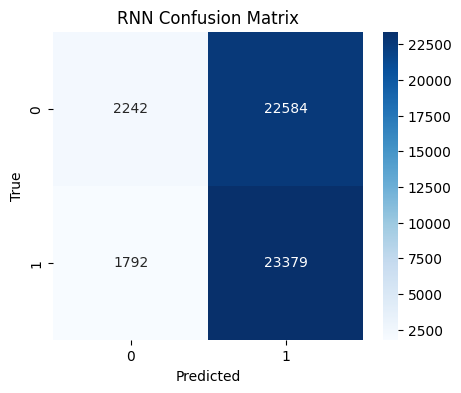

=== Confusion Matrix: LSTM ===


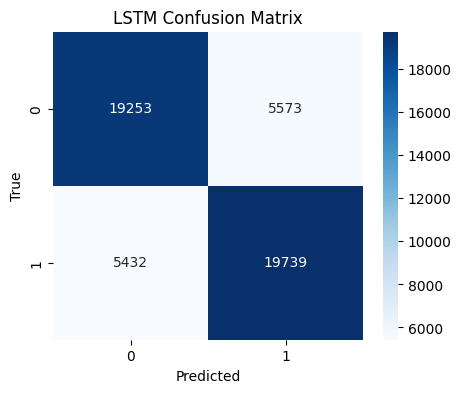

=== Confusion Matrix: RNN+Attention ===


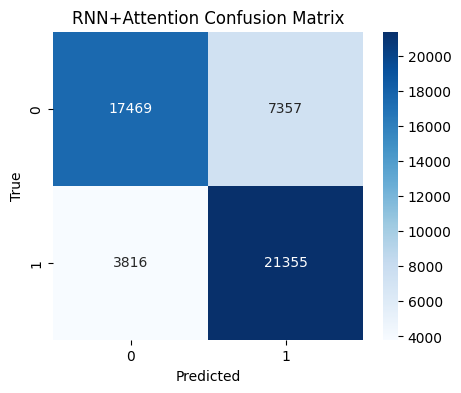

In [14]:
############################
# 9. 혼동 행렬(Confusion Matrix) 시각화
############################

def plot_confusion_matrix(model, data_loader, title="Confusion Matrix"):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for (inputs, labels) in data_loader:
            inputs = inputs.to(device)
            labels = labels.squeeze().to(device)

            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

print("=== Confusion Matrix: RNN ===")
plot_confusion_matrix(rnn_model, test_loader, title="RNN Confusion Matrix")

print("=== Confusion Matrix: LSTM ===")
plot_confusion_matrix(lstm_model, test_loader, title="LSTM Confusion Matrix")

print("=== Confusion Matrix: RNN+Attention ===")
plot_confusion_matrix(attn_model, test_loader, title="RNN+Attention Confusion Matrix")


In [15]:
import torch
import torch.nn.functional as F

# 문장을 모델이 예측할 수 있도록 변환하고 감정 분석 수행
def predict_sentiment(model, sentence, word2idx, max_len=30):
    """
    감정 분석을 수행하는 함수 (입력 문장을 숫자 토큰으로 변환 후 모델에 입력)
    """
    model.eval()
    tokens = tokenize(sentence)  # 형태소 분석 및 토큰화
    token_ids = [word2idx.get(tok, word2idx["<unk>"]) for tok in tokens]  # 단어를 ID로 변환
    token_ids = pad_sequences(token_ids, max_len)  # 패딩 적용

    input_tensor = torch.LongTensor(token_ids).unsqueeze(0).to(device)  # (1, seq_len)

    with torch.no_grad():
        output = model(input_tensor)  # 모델 예측
        probs = F.softmax(output, dim=1)  # 확률 값
        pred_label = torch.argmax(probs, dim=1).item()  # 예측 라벨 (0: 부정, 1: 긍정)

    return pred_label, probs.squeeze().cpu().numpy()


In [16]:
# 예측 함수: 3개 모델 모두 실행
def predict_with_all_models(sentence):
    """
    사용자 입력 문장에 대해 RNN, LSTM, RNN+Attention 모델이 각각 어떻게 예측하는지 출력
    """
    print("\n💬 입력 문장:", sentence)
    print("=" * 50)

    models = {
        "RNN": rnn_model,
        "LSTM": lstm_model,
        "RNN+Attention": attn_model
    }

    for model_name, model in models.items():
        label, probs = predict_sentiment(model, sentence, word2idx)
        sentiment = "긍정 😊" if label == 1 else "부정 😡"

        print(f"🧠 [{model_name} 모델]")
        print(f"🔍 예측 감정: {sentiment}")
        print(f"📊 확률: 부정 {probs[0]:.4f} | 긍정 {probs[1]:.4f}")
        print("-" * 50)

# 사용자 입력 받기
sample_sentence = input("문장을 입력하세요: ")
predict_with_all_models(sample_sentence)


문장을 입력하세요: 너 진짜 별로야

💬 입력 문장: 너 진짜 별로야
🧠 [RNN 모델]
🔍 예측 감정: 긍정 😊
📊 확률: 부정 0.4493 | 긍정 0.5507
--------------------------------------------------
🧠 [LSTM 모델]
🔍 예측 감정: 부정 😡
📊 확률: 부정 0.9989 | 긍정 0.0011
--------------------------------------------------
🧠 [RNN+Attention 모델]
🔍 예측 감정: 부정 😡
📊 확률: 부정 0.9999 | 긍정 0.0001
--------------------------------------------------
